In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

First we take the dataset and reshape it as we need, like it is in the Temperature_Pred and Dewpoint_Pred

In [19]:
data = pd.read_csv("climate_data.csv")
data.head()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['diff_temperature'] = data['Maximum temperature (°F)'] - data['Minimum temperature (°F)']
data['diff_humidity'] = data['Maximum humidity (%)'] - data['Minimum humidity (%)']
data = data.asfreq('D')
data = data.fillna(method='ffill')
data['Dayofyear'] = data.index.dayofyear
data['day_sin'] = np.sin(2 * np.pi * data['Dayofyear'] / 365)
data['day_cos'] = np.cos(2 * np.pi * data['Dayofyear'] / 365)
data = data.drop(columns=['Dayofyear'])
data = pd.DataFrame(data)
data.head()

C:\Users\paula\AppData\Local\Temp\ipykernel_40500\1906907565.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure,diff_temperature,diff_humidity,day_sin,day_cos
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,0.0,...,41.4,59.0,40.0,2009-01-01,1.0,0.166,6.0,-23.0,0.017213,0.999852
2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,0.0,...,35.7,51.0,52.0,2009-01-02,1.0,0.401,15.0,-12.0,0.034422,0.999407
2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,0.0,...,25.3,38.0,41.0,2009-01-03,1.0,0.972,35.0,-27.0,0.051620,0.998667
2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,0.0,...,12.7,20.0,32.0,2009-01-04,1.0,0.339,19.0,-28.0,0.068802,0.997630
2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,0.0,...,38.0,53.0,32.0,2009-01-05,1.0,0.665,15.0,-8.0,0.085965,0.996298


We use the evaluate fonction to be sure it's work as same as the other fill

In [20]:
def evaluate(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    print(f"\n {name}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    return mae, rmse, r2

Now we train the to model for the to features

In [21]:
features_temp = ['Average humidity (%)', 
            'Average windspeed (mph)',
            'Average barometer (in)',
            'Average dewpoint (°F)',
            'diff_temperature',
            'diff_humidity',
            'day_sin',
            'day_cos'
            ]
target_temp = ['Average temperature (°F)']

X_t = data[features_temp]
y_t = data[target_temp]

split = int(len(data) * 0.8)
X_train_t = X_t.iloc[:split]
y_train_t = y_t.iloc[:split]

X_test_t  = X_t.iloc[split:]
y_test_t  = y_t.iloc[split:]

model = SARIMAX( y_train_t,X_train_t) #Build the SARIMAX model
ModelTemp = model.fit(disp = 1) #Fit the SARIMAx model

temp_pred_test = ModelTemp.predict(
    start=y_test_t.index[0],
    end=y_test_t.index[-1],
    exog=X_test_t
)

evaluate("SARIMAX t", y_test_t, temp_pred_test)


 SARIMAX t
MAE  : 1.8207
RMSE : 2.5117
R²   : 0.9749


c:\Users\paula\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1.820742846851684, 2.5116651377779706, 0.9748754866584257)

In [22]:

features_dew = ['Average temperature (°F)', 
                 'Average humidity (%)', 
                 'Average windspeed (mph)', 
                 'Average gustspeed (mph)', 
                 'Average barometer (in)']
target_dew = ['Average dewpoint (°F)']

X_d = data[features_dew]
y_d = data[target_dew]

split = int(len(data) * 0.8)
X_train_d = X_d.iloc[:split]
y_train_d = y_d.iloc[:split]

X_test_d  = X_d.iloc[split:]
y_test_d = y_d.iloc[split:]

model = SARIMAX( y_train_d,X_train_d) #Build the SARIMAX model
ModelDew = model.fit(disp = 1) #Fit the SARIMAx model

dew_pred_test = ModelDew.predict(
    start=y_test_d.index[0],
    end=y_test_d.index[-1],
    exog=X_test_d
)

evaluate("SARIMAX d", y_test_d, dew_pred_test)


 SARIMAX d
MAE  : 1.8433
RMSE : 2.5630
R²   : 0.9677


(1.8432817506813668, 2.5630446473437445, 0.96770886735083)

In [23]:
model = SARIMAX( y_d,X_d) #Build the SARIMAX model
ModelDew = model.fit(disp = 1) #Fit the SARIMAx model
model = SARIMAX( y_t,X_t) #Build the SARIMAX model
ModelTemp = model.fit(disp = 1) #Fit the SARIMAx model

c:\Users\paula\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
n_future = 365  # 1 an
last_date = data.index[-1]

future_index = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=n_future,
    freq="D"
)

X_future = data.iloc[-365:].copy()
X_future.index = future_index
day = future_index.dayofyear
X_future["day_sin"] = np.sin(2 * np.pi * day / 365)
X_future["day_cos"] = np.cos(2 * np.pi * day / 365)

X_t_prevyear = X_t.shift(365)
X_d_prevyear = X_d.shift(365)

index_temp_pred = X_t_prevyear.index[-365:]
index_dew_pred  = X_d_prevyear.index[-365:]

X_t_prevyear_last = X_t_prevyear.loc[index_temp_pred]
X_d_prevyear_last = X_d_prevyear.loc[index_dew_pred]

result_temp = ModelTemp.predict(
    start=X_future.index[0],
    end=X_future.index[-1],
    exog=X_t_prevyear_last
)

result_dew = ModelDew.predict(
    start=X_future.index[0],
    end=X_future.index[-1],
    exog=X_d_prevyear_last
)


In [25]:
result_temp = pd.DataFrame(
    (result_temp - 32) * 5/9 + 273.15
)
result_temp.rename(columns={"predicted_mean": "Average temperature (K)"}, inplace=True)

result_dew = pd.DataFrame(
    (result_dew - 32) * 5/9 + 273.15
)
result_dew.rename(columns={"predicted_mean": "Average dewpoint (K)"}, inplace=True)

The features are predictions for next year, now we do the calculation to get the FrostPoint

In [26]:
T  = result_temp["Average temperature (K)"]
Td = result_dew["Average dewpoint (K)"]
Tf_K = Td + 2671.02 / (2954.61 / T + 2.193665 * np.log(T) - 13.3448) - T

result_frostpoint = pd.DataFrame(
    Tf_K- 273.15,
    columns=["Frost point (°C)"]
)
result_frostpoint.head()
result_temp = pd.DataFrame(
    result_temp - 273.15
)
result_temp.rename(columns={"Average temperature (K)": "Average temperature (°C)"}, inplace=True)

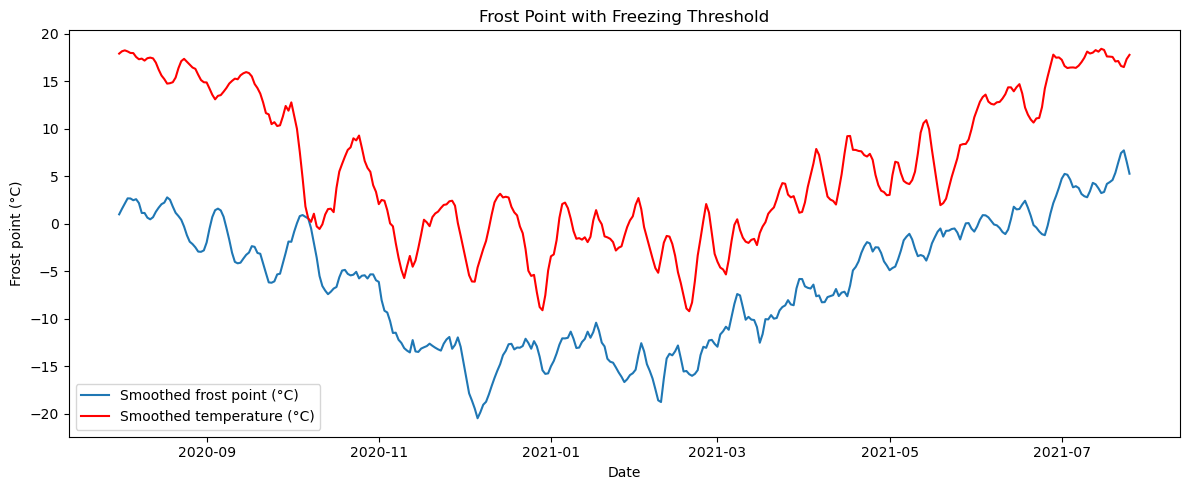

In [27]:
smoothed_frost = result_frostpoint["Frost point (°C)"].rolling(window=7, center=True).mean()
smoothed_temp  = result_temp["Average temperature (°C)"].rolling(window=7, center=True).mean()

# --- 2. Plot the smoothed frost point with freezing threshold ---
plt.figure(figsize=(12,5))
plt.plot(result_frostpoint.index, smoothed_frost, label="Smoothed frost point (°C)")
plt.plot(result_temp.index, smoothed_temp, label="Smoothed temperature (°C)", color="red")

plt.title("Frost Point with Freezing Threshold")
plt.xlabel("Date")
plt.ylabel("Frost point (°C)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 3. Detect frost periods (frost point < 0°C) ---
is_frost = result_frostpoint["Frost point (°C)"] >= result_temp["Average temperature (°C)"]

frost_periods = []
current_start = None

for date, frost_cond in is_frost.items():
    if frost_cond and current_start is None:
        current_start = date
    elif not frost_cond and current_start is not None:
        frost_periods.append((current_start, date - pd.Timedelta(days=1)))
        current_start = None

# If frost continues until the final date
if current_start is not None:
    frost_periods.append((current_start, result_frostpoint.index[-1]))

In [28]:
print("Detected frost periods:")
for start, end in frost_periods:
    print(f"- From {start.date()} to {end.date()}")

Detected frost periods:
- From 2020-10-05 to 2020-10-09
- From 2020-10-13 to 2020-10-13
- From 2020-10-29 to 2020-10-29
- From 2020-11-10 to 2020-11-10
- From 2020-11-16 to 2020-11-16
- From 2020-12-26 to 2020-12-26
- From 2021-03-01 to 2021-03-01
- From 2021-03-12 to 2021-03-12
- From 2021-04-01 to 2021-04-01
- From 2021-04-09 to 2021-04-09
- From 2021-04-21 to 2021-04-21
- From 2021-04-28 to 2021-04-29
- From 2021-05-07 to 2021-05-08
- From 2021-05-19 to 2021-05-22


In [32]:
long_frost_periods = []

for start, end in frost_periods:
    duration = (end - start).days + 1     
    if duration > 3:
        long_frost_periods.append((start, end, duration))

print("Frost periods longer than 3 days:")

for start, end, duration in long_frost_periods:
    print(f"- From {start.date()} to {end.date()}  ({duration} days)")


Frost periods longer than 3 days:
- From 2020-10-05 to 2020-10-09  (5 days)
- From 2021-05-19 to 2021-05-22  (4 days)
